## I first download data from Kaggle.com. I select the Pitchfork Reviews dataset. 

In [24]:
import sqlite3
import pandas as pd
import matplotlib
connection = sqlite3.connect ("/Users/kurtisgilliat/Downloads/database.sqlite 4")

## I next examine the datasets contained within the Pitchfork dataset

In [25]:
head_df = pd.read_sql_query ("SELECT * FROM sqlite_master;", connection)
head_df

,type,name,tbl_name,rootpage,sql
0,table,reviews,reviews,2,"CREATE TABLE reviews (\n\treviewid INTEGER,\n\..."
1,table,artists,artists,3,"CREATE TABLE artists (\n\treviewid INTEGER, ar..."
2,table,genres,genres,4,"CREATE TABLE genres (\n\treviewid INTEGER, gen..."
3,table,labels,labels,5,"CREATE TABLE labels (\n\treviewid INTEGER, lab..."
4,table,years,years,6,"CREATE TABLE years (\n\treviewid INTEGER, year..."
5,table,content,content,7,"CREATE TABLE content (\n\treviewid INTEGER, co..."


## From the tables, I'm interested in "reviews" and "genres". It'd be interesting to see how average reviews given vary by genre. I further examine both of these tables to see which variables they contain. 

In [26]:
reviews_df = pd.read_sql_query ("SELECT * FROM reviews limit 10;", connection)
reviews_df

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
5,22722,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017
6,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017
7,22694,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017
8,22714,reflection,brian eno,http://pitchfork.com/reviews/albums/22714-refl...,7.7,0,andy beta,contributor,2017-01-04,2,4,1,2017
9,22724,filthy america its beautiful,the lox,http://pitchfork.com/reviews/albums/22724-filt...,5.3,0,ian cohen,contributor,2017-01-04,2,4,1,2017


In [27]:
#examine the genres table.
genres_df = pd.read_sql_query ("SELECT * FROM genres limit 10;", connection)
genres_df

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic
5,22722,None
6,22704,rap
7,22694,electronic
8,22714,experimental
9,22724,rap


## From the variables contained in both datasets, I select a few which I'm interested in. I also look for missing variables. Genre appears to be missing randomly, so I drop missing values. 

In [28]:
music_df = pd.read_sql_query("SELECT reviews.reviewid, title, artist, score, best_new_music, pub_year, genre FROM reviews INNER JOIN genres ON reviews.reviewid = genres.reviewid", connection)
music_df

,reviewid,title,artist,score,best_new_music,pub_year,genre
0,22703,mezzanine,massive attack,9.3,0,2017,electronic
1,22721,prelapsarian,krallice,7.9,0,2017,metal
2,22659,all of them naturals,uranium club,7.3,0,2017,rock
3,22661,first songs,"kleenex, liliput",9.0,1,2017,rock
4,22725,new start,taso,8.1,0,2017,electronic
5,22722,insecure (music from the hbo original series),various artists,7.4,0,2017,None
6,22704,stillness in wonderland,little simz,7.1,0,2017,rap
7,22694,tehillim,yotam avni,7.0,0,2017,electronic
8,22714,reflection,brian eno,7.7,0,2017,experimental
9,22724,filthy america its beautiful,the lox,5.3,0,2017,rap


In [29]:
music_df.columns[music_df.isnull().any()]

Index(['genre'], dtype='object')

In [30]:
music2_df = pd.read_sql_query("SELECT reviews.reviewid, title, artist, score, best_new_music, pub_year, genre FROM reviews INNER JOIN genres ON reviews.reviewid = genres.reviewid WHERE genre IS NOT null", connection)
music2_df

,reviewid,title,artist,score,best_new_music,pub_year,genre
0,22703,mezzanine,massive attack,9.3,0,2017,electronic
1,22721,prelapsarian,krallice,7.9,0,2017,metal
2,22659,all of them naturals,uranium club,7.3,0,2017,rock
3,22661,first songs,"kleenex, liliput",9.0,1,2017,rock
4,22725,new start,taso,8.1,0,2017,electronic
5,22704,stillness in wonderland,little simz,7.1,0,2017,rap
6,22694,tehillim,yotam avni,7.0,0,2017,electronic
7,22714,reflection,brian eno,7.7,0,2017,experimental
8,22724,filthy america its beautiful,the lox,5.3,0,2017,rap
9,22715,clear sounds/perfetta,harry bertoia,8.0,0,2017,experimental


## Next I look at some summary statistics of my numerical variables. Everything appears to behave as expected. Score is always between 1 and 10, and best_new_music is always between 0 and 1. 

In [31]:
music2_df.describe()

,reviewid,score,best_new_music,pub_year
count,20319.000000,20319.000000,20319.000000,20319.000000
mean,11953.043949,6.988031,0.053251,2008.372951
std,6216.968451,1.314614,0.224538,4.553689
min,1.000000,0.000000,0.000000,1999.000000
25%,6997.500000,6.400000,0.000000,2005.000000
50%,12284.000000,7.200000,0.000000,2008.000000
75%,16725.500000,7.800000,0.000000,2012.000000
max,22745.000000,10.000000,1.000000,2017.000000


## Next I determine the unique values for genre and make a box plot. The box plot shows that all numerical values behave as expected with no obvious outliers. That's good. 

In [32]:
music2_df['genre'].unique()

array(['electronic', 'metal', 'rock', 'rap', 'experimental', 'pop/r&b',
       'folk/country', 'jazz', 'global'], dtype=object)

In [33]:
%matplotlib inline

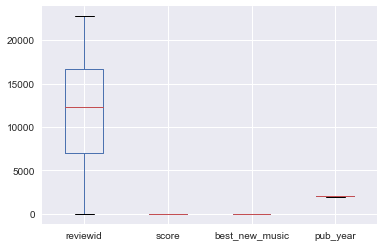

In [34]:
box = music2_df.plot(kind="box")

## I count up the number of albums per genre to better understand the genre variable. Most albums are rock, with electronic coming in second place. 

In [35]:
 music2_df['genre'].value_counts()

rock            9438
electronic      3874
experimental    1815
rap             1559
pop/r&b         1432
metal            862
folk/country     685
jazz             435
global           219
Name: genre, dtype: int64

## I examine the correlations between variables. It makes sense that score and best new music are correlated. Pub_year and reviewid are also highly correlated because reviewid is assigned based on the pub_year. 

In [36]:
music2_df.corr()

,reviewid,score,best_new_music,pub_year
reviewid,1.000000,0.034284,0.095851,0.938376
score,0.034284,1.000000,0.303419,0.038551
best_new_music,0.095851,0.303419,1.000000,0.105824
pub_year,0.938376,0.038551,0.105824,1.000000


## To answer my question of interest, I create a table showing how average score and the best_new_music variables vary by genre. It appears global music is generally reviewed the highest. However, there are few global albums released each year. Experimental seems to be the highest rated genre with a significant number of albums released per year. I also show this information using a bar chart.

In [37]:
music2_df = pd.read_sql_query ("SELECT genre, COUNT(genre), AVG(score) AS average_score, AVG(best_new_music) FROM genres INNER JOIN reviews ON reviews.reviewid = genres.reviewid GROUP BY genre;", connection)
music2_df

,genre,COUNT(genre),average_score,AVG(best_new_music)
0,None,0,7.017925,0.021088
1,electronic,3874,6.920702,0.048271
2,experimental,1815,7.336694,0.067218
3,folk/country,685,7.202190,0.039416
4,global,219,7.429680,0.041096
5,jazz,435,7.303908,0.039080
6,metal,862,6.950000,0.030162
7,pop/r&b,1432,6.883799,0.059358
8,rap,1559,6.900513,0.050674
9,rock,9438,6.942011,0.056156


In [38]:
import seaborn as sns

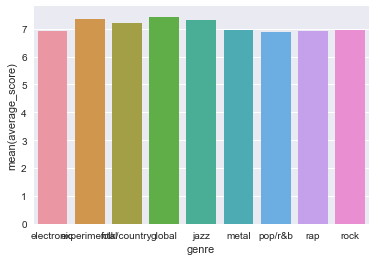

In [39]:
sns.barplot(music2_df.genre, music2_df.average_score)
